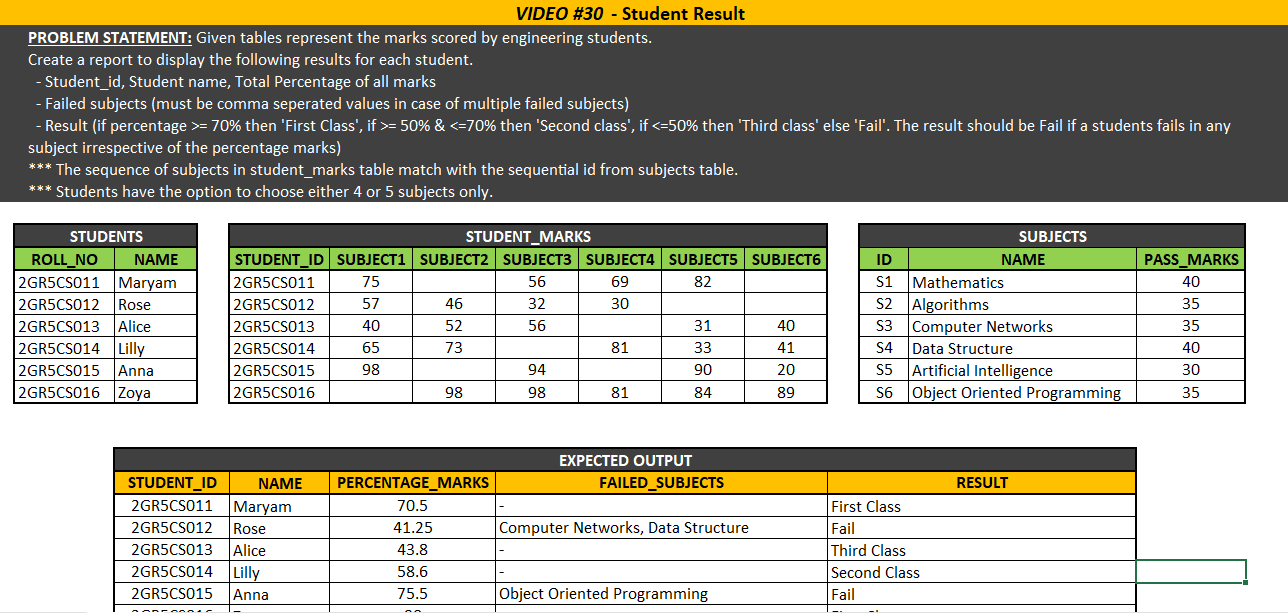

In [48]:
import pandas as pd

# Creating the STUDENTS DataFrame
students_data = {
    'ROLL_NO': ['2GR5CS011', '2GR5CS012', '2GR5CS013', '2GR5CS014', '2GR5CS015', '2GR5CS016'],
    'NAME': ['Maryam', 'Rose', 'Alice', 'Lilly', 'Anna', 'Zoya'],
    'STUDENT_ID': ['2GR5CS011', '2GR5CS012', '2GR5CS013', '2GR5CS014', '2GR5CS015', '2GR5CS016'],
    'SUBJECT1': [75, 57, 40, 65, 98, None],
    'SUBJECT2': [56, 46, 52, 73, None, 98],
    'SUBJECT3': [69, 32, 56, None, 94, 81],
    'SUBJECT4': [82, 30, None, 81, None, 84],
    'SUBJECT5': [None, None, 31, 33, 90, 89],
    'SUBJECT6': [None, None, 40, 41, 20, None]
}

students_df = pd.DataFrame(students_data)

# Creating the SUBJECTS DataFrame
subjects_data = {
    'ID': ['S1', 'S2', 'S3', 'S4', 'S5', 'S6'],
    'NAME': ['Mathematics', 'Algorithms', 'Computer Networks', 'Data Structure', 'Artificial Intelligence', 'Object Oriented Programming'],
    'PASS_MARKS': [40, 35, 35, 40, 30, 35]
}

subjects_df = pd.DataFrame(subjects_data)

# Displaying the DataFrames
print("Students DataFrame:")
print(students_df)
print("\nSubjects DataFrame:")
print(subjects_df)


Students DataFrame:
     ROLL_NO    NAME STUDENT_ID  SUBJECT1  SUBJECT2  SUBJECT3  SUBJECT4  \
0  2GR5CS011  Maryam  2GR5CS011      75.0      56.0      69.0      82.0   
1  2GR5CS012    Rose  2GR5CS012      57.0      46.0      32.0      30.0   
2  2GR5CS013   Alice  2GR5CS013      40.0      52.0      56.0       NaN   
3  2GR5CS014   Lilly  2GR5CS014      65.0      73.0       NaN      81.0   
4  2GR5CS015    Anna  2GR5CS015      98.0       NaN      94.0       NaN   
5  2GR5CS016    Zoya  2GR5CS016       NaN      98.0      81.0      84.0   

   SUBJECT5  SUBJECT6  
0       NaN       NaN  
1       NaN       NaN  
2      31.0      40.0  
3      33.0      41.0  
4      90.0      20.0  
5      89.0       NaN  

Subjects DataFrame:
   ID                         NAME  PASS_MARKS
0  S1                  Mathematics          40
1  S2                   Algorithms          35
2  S3            Computer Networks          35
3  S4               Data Structure          40
4  S5      Artificial Intellig

In [49]:
def check_pass(row):
    s = []
    results = []
    for i in range(1, 7):  # For SUBJECT1 to SUBJECT6
        subject_col = f'SUBJECT{i}'
        if not pd.isna(row[subject_col]):
            s.append(row[subject_col])
            
        if pd.isna(row[subject_col]):
            pass
        elif row[subject_col] >= subjects_df.loc[i - 1, 'PASS_MARKS']:
            pass
        else:
            results.append(subjects_df.loc[i - 1, 'NAME'])
    return pd.Series([sum(s)/len(s),results])
students_df[["PERCENTAGE_MARKS", "FAILED_SUBJECTS"]]=students_df.apply(check_pass,axis=1) 

In [50]:
students_df

,ROLL_NO,NAME,STUDENT_ID,SUBJECT1,SUBJECT2,SUBJECT3,SUBJECT4,SUBJECT5,SUBJECT6,PERCENTAGE_MARKS,FAILED_SUBJECTS
0,2GR5CS011,Maryam,2GR5CS011,75.0,56.0,69.0,82.0,NaN,NaN,70.50,[]
1,2GR5CS012,Rose,2GR5CS012,57.0,46.0,32.0,30.0,NaN,NaN,41.25,"[Computer Networks, Data Structure]"
2,2GR5CS013,Alice,2GR5CS013,40.0,52.0,56.0,NaN,31.0,40.0,43.80,[]
3,2GR5CS014,Lilly,2GR5CS014,65.0,73.0,NaN,81.0,33.0,41.0,58.60,[]
4,2GR5CS015,Anna,2GR5CS015,98.0,NaN,94.0,NaN,90.0,20.0,75.50,[Object Oriented Programming]
5,2GR5CS016,Zoya,2GR5CS016,NaN,98.0,81.0,84.0,89.0,NaN,88.00,[]


In [51]:
students_df["FAILED_SUBJECTS"]=students_df["FAILED_SUBJECTS"].apply(lambda x: "-" if len(x)==0 else ", ".join(x))
students_df

,ROLL_NO,NAME,STUDENT_ID,SUBJECT1,SUBJECT2,SUBJECT3,SUBJECT4,SUBJECT5,SUBJECT6,PERCENTAGE_MARKS,FAILED_SUBJECTS
0,2GR5CS011,Maryam,2GR5CS011,75.0,56.0,69.0,82.0,NaN,NaN,70.50,-
1,2GR5CS012,Rose,2GR5CS012,57.0,46.0,32.0,30.0,NaN,NaN,41.25,"Computer Networks, Data Structure"
2,2GR5CS013,Alice,2GR5CS013,40.0,52.0,56.0,NaN,31.0,40.0,43.80,-
3,2GR5CS014,Lilly,2GR5CS014,65.0,73.0,NaN,81.0,33.0,41.0,58.60,-
4,2GR5CS015,Anna,2GR5CS015,98.0,NaN,94.0,NaN,90.0,20.0,75.50,Object Oriented Programming
5,2GR5CS016,Zoya,2GR5CS016,NaN,98.0,81.0,84.0,89.0,NaN,88.00,-


In [52]:
def result_final(row):
    if row["FAILED_SUBJECTS"]=="-":
        if row["PERCENTAGE_MARKS"] >= 70:
            return "First Calss"
        elif row["PERCENTAGE_MARKS"] >= 50 and row["PERCENTAGE_MARKS"]< 70:
            return "Second class"
        else:
            return "Third Class"
    else:
        return "Fail"
        
students_df["RESULT"]=students_df.apply(result_final,axis=1)

In [53]:
students_df

,ROLL_NO,NAME,STUDENT_ID,SUBJECT1,SUBJECT2,SUBJECT3,SUBJECT4,SUBJECT5,SUBJECT6,PERCENTAGE_MARKS,FAILED_SUBJECTS,RESULT
0,2GR5CS011,Maryam,2GR5CS011,75.0,56.0,69.0,82.0,NaN,NaN,70.50,-,First Calss
1,2GR5CS012,Rose,2GR5CS012,57.0,46.0,32.0,30.0,NaN,NaN,41.25,"Computer Networks, Data Structure",Fail
2,2GR5CS013,Alice,2GR5CS013,40.0,52.0,56.0,NaN,31.0,40.0,43.80,-,Third Class
3,2GR5CS014,Lilly,2GR5CS014,65.0,73.0,NaN,81.0,33.0,41.0,58.60,-,Second class
4,2GR5CS015,Anna,2GR5CS015,98.0,NaN,94.0,NaN,90.0,20.0,75.50,Object Oriented Programming,Fail
5,2GR5CS016,Zoya,2GR5CS016,NaN,98.0,81.0,84.0,89.0,NaN,88.00,-,First Calss


In [54]:
students_df[["ROLL_NO","NAME", "PERCENTAGE_MARKS", "FAILED_SUBJECTS","RESULT"]]

,ROLL_NO,NAME,PERCENTAGE_MARKS,FAILED_SUBJECTS,RESULT
0,2GR5CS011,Maryam,70.50,-,First Calss
1,2GR5CS012,Rose,41.25,"Computer Networks, Data Structure",Fail
2,2GR5CS013,Alice,43.80,-,Third Class
3,2GR5CS014,Lilly,58.60,-,Second class
4,2GR5CS015,Anna,75.50,Object Oriented Programming,Fail
5,2GR5CS016,Zoya,88.00,-,First Calss
